In [35]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)


In [36]:
## Read data in, change path as necessary

# One line per election
elections_2016 <- read.csv("2016_election_results_wide.csv")

# One line per candidate
elections_2016_long <- read.csv("2016_election_results_long.csv")

# One line per election
elections_2018 <- read.csv("2018_election_results_wide.csv")

# One line per candidate
elections_2018_long <- read.csv("2018_election_results_long.csv")

head(elections_2016)
head(elections_2016_long)
head(elections_2018)
head(elections_2018_long)


,X,democrat,republican,other,state,year,district,democrat_incumbent,democrat_votes,republican_incumbent,republican_votes,other_incumbent,other_votes,gender_dem,gender_rep,winner_party,winner_gender,vote_prop_dem,vote_prop_rep,vote_prop_other
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,Scott J. Kawasaki,No candidate,No candidate,Alaska,2016,1,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
2,2,Truno Holdaway,Steve M. Thompson,No candidate,Alaska,2016,2,False,1153,True,3268,0,0,Unknown,male,Republican,male,0.26080072,0.7391993,0.0000000
3,3,Christina M. Sinclair,Tammie Wilson,Jeanne Olson,Alaska,2016,3,False,537,True,4291,False,2270,female,female,Republican,female,0.07565511,0.6045365,0.3198084
4,4,David Guttenberg,No candidate,No candidate,Alaska,2016,4,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
5,5,Adam Wool,Aaron Lojewski,No candidate,Alaska,2016,5,True,3812,False,3384,0,0,male,male,Democrat,male,0.52973874,0.4702613,0.0000000
6,6,Jason T. Land,David M. Talerico,No candidate,Alaska,2016,6,False,2327,True,5126,0,0,male,male,Republican,male,0.31222327,0.6877767,0.0000000


,X,candidate,state,district,year,incumbent,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat,Missing
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat,Missing
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat,Missing
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat,Missing


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing


In [37]:
## Add regions in
## Region generator
# Need to manually change states depending on form, e.g. RI/Rhode Island/RHODE ISLAND

states_northeast <- c("Connecticut", "Maine", "Massachusetts",
                      "New Hampshire", "New Jersey", "New York", "Pennsylvania", 
                      "Rhode Island", "Vermont")
states_west <- c("Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", 
                 "New Mexico", "Oregon", "Utah", "Washington", "Wyoming")
states_midwest <- c("Indiana", "Illinois", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", 
                    "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")
states_south <- c("Alabama", "Arkansas", "Delaware", "District of Columbia", 
                  "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", 
                  "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", 
                  "Virginia", "West Virginia")
elections_2016 <- elections_2016 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2016_long <- elections_2016_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018 <- elections_2018 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018_long <- elections_2018_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



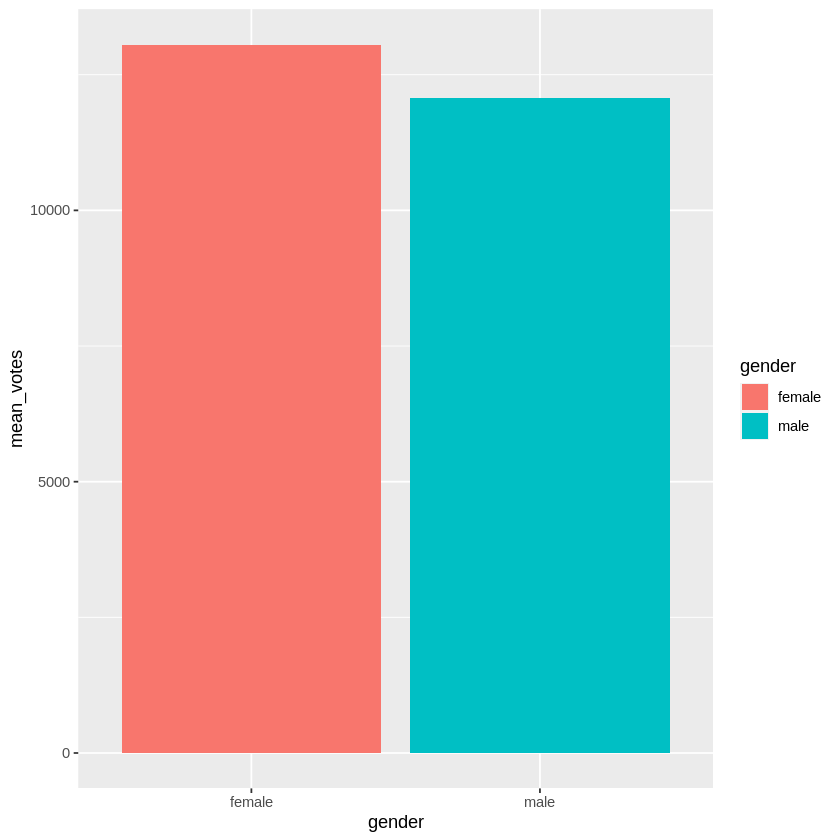

`summarise()` ungrouping output (override with `.groups` argument)



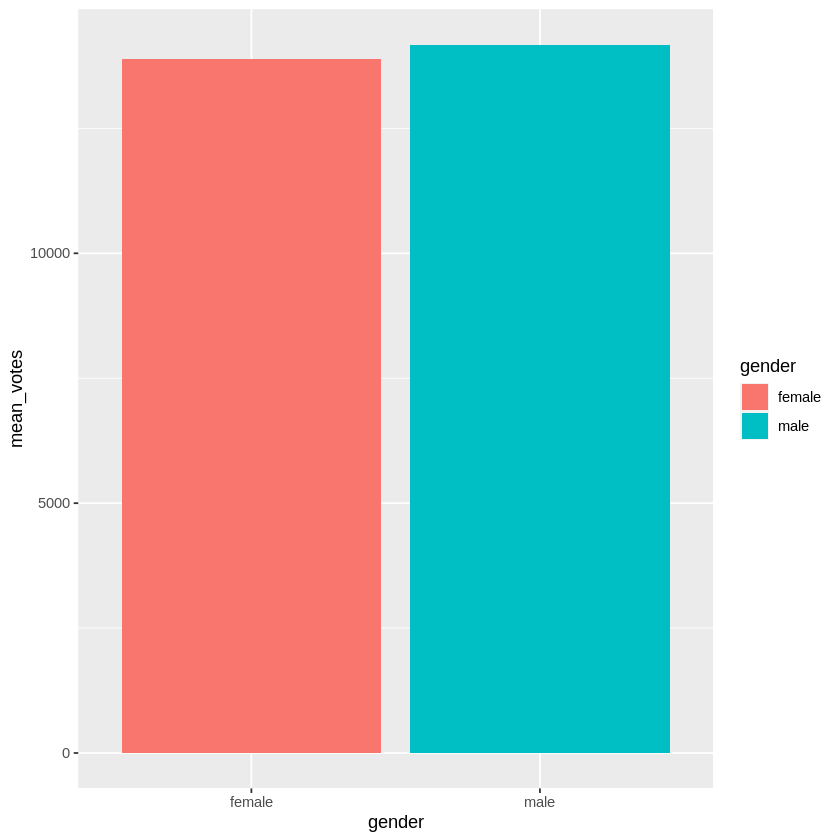

`summarise()` ungrouping output (override with `.groups` argument)



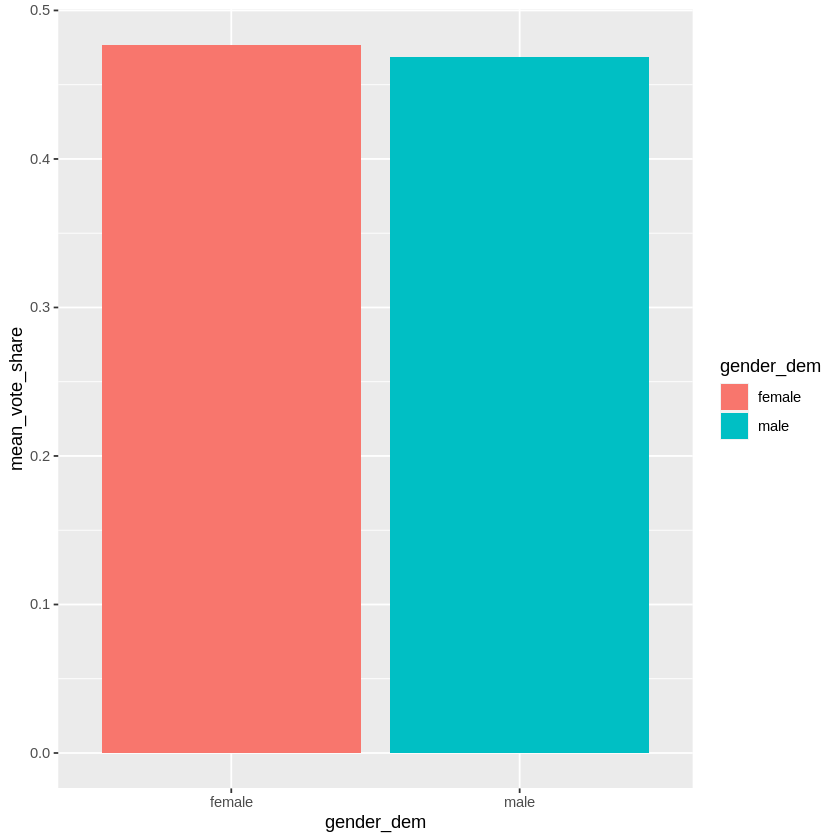

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



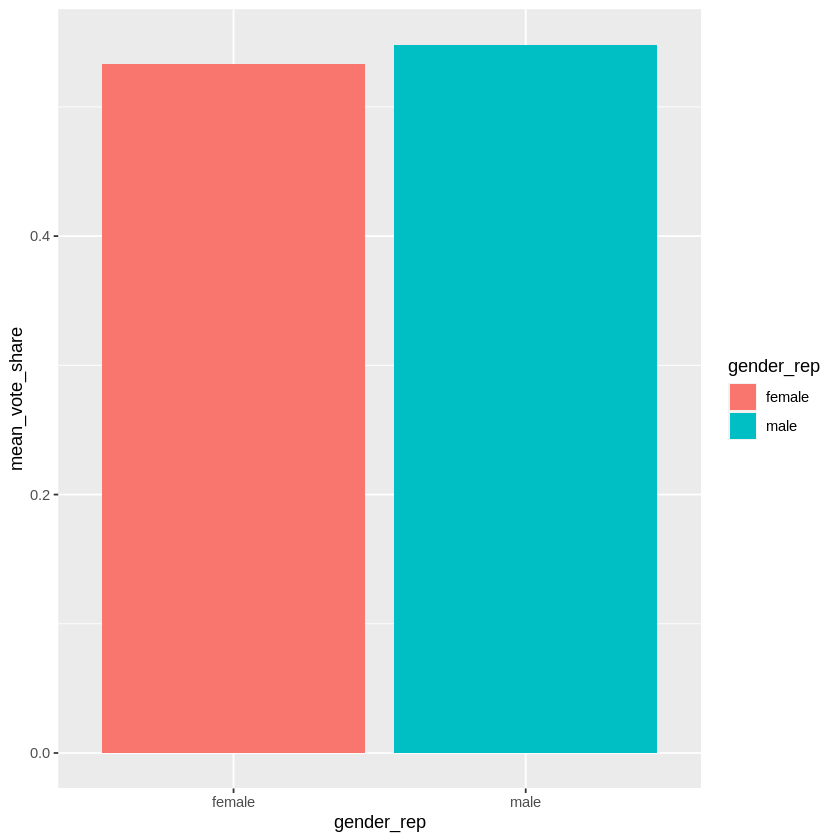

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



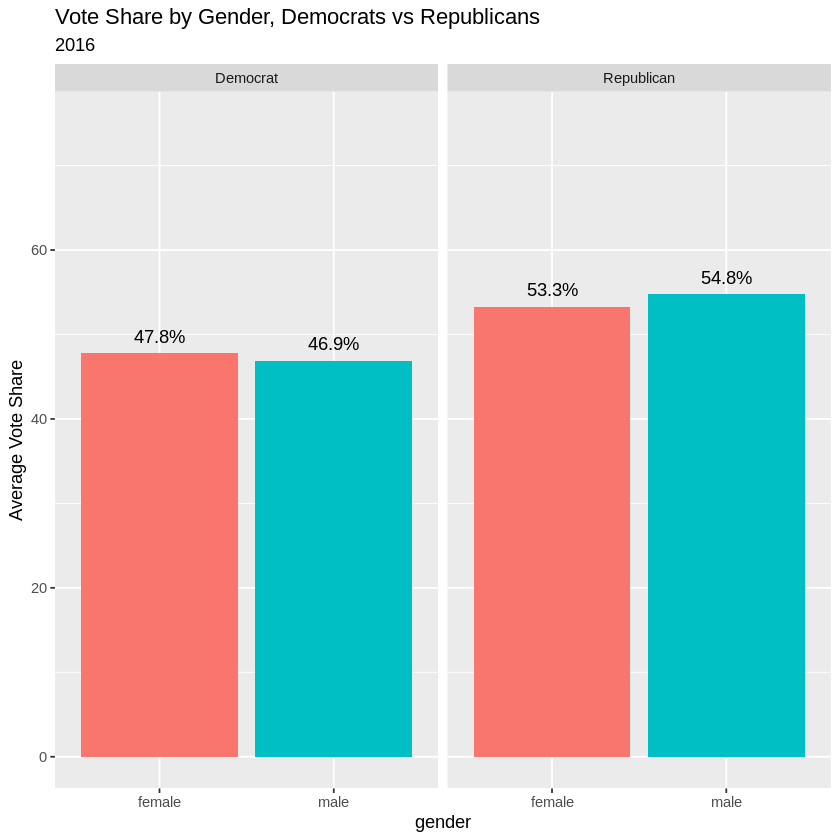

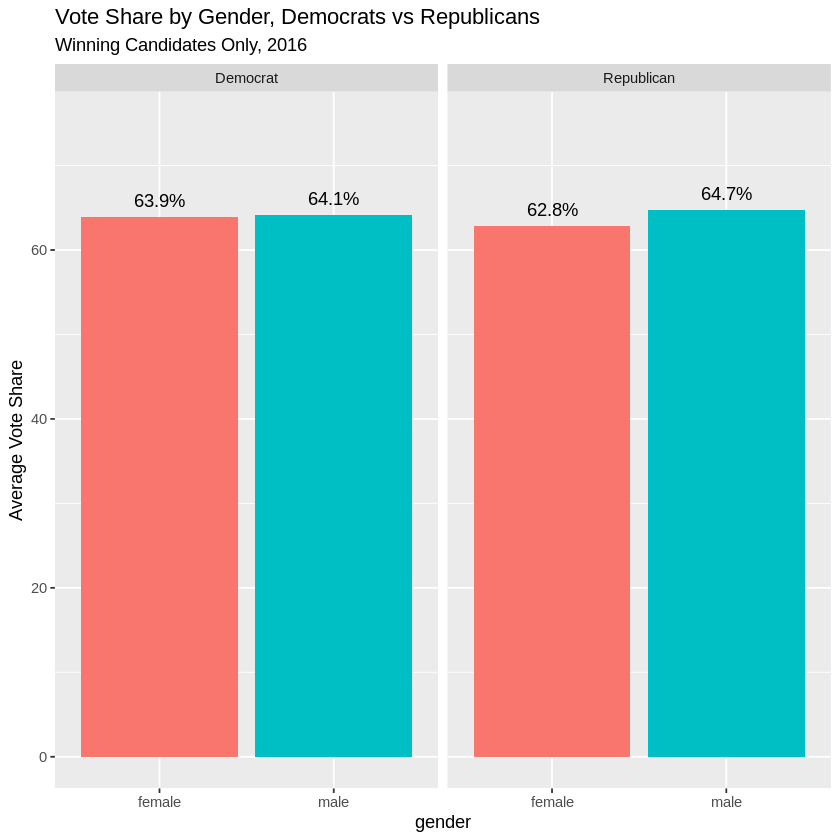

In [38]:
## Basic descriptives for 2016, separated by party

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%
    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")
        


elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%
    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_dem) %>%
    filter(gender_dem %in% c("male", "female"), !is.na(vote_prop_dem), !vote_prop_dem == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_dem)) %>%
    ggplot(aes(x = gender_dem, y = mean_vote_share, fill = gender_dem)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_rep) %>%
    filter(gender_rep %in% c("male", "female"), !is.na(vote_prop_rep), !vote_prop_rep == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_rep)) %>% 
    ggplot(aes(x = gender_rep, y = mean_vote_share, fill = gender_rep)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "2016",
            x = "gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1, candidate_party == winner_party) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "Winning Candidates Only, 2016",
            x = "gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")



`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



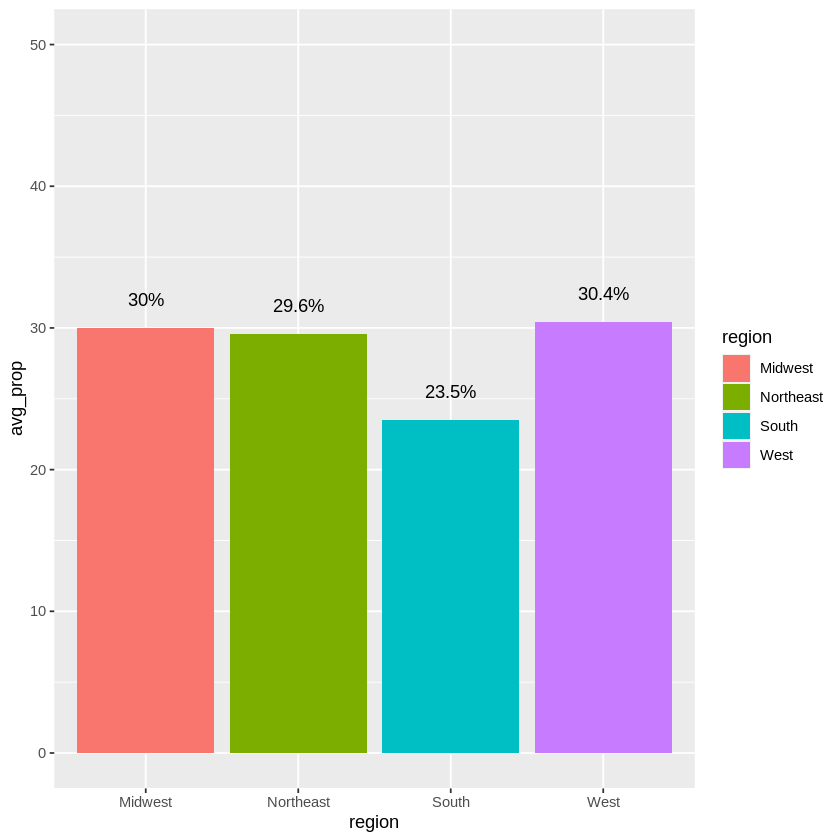

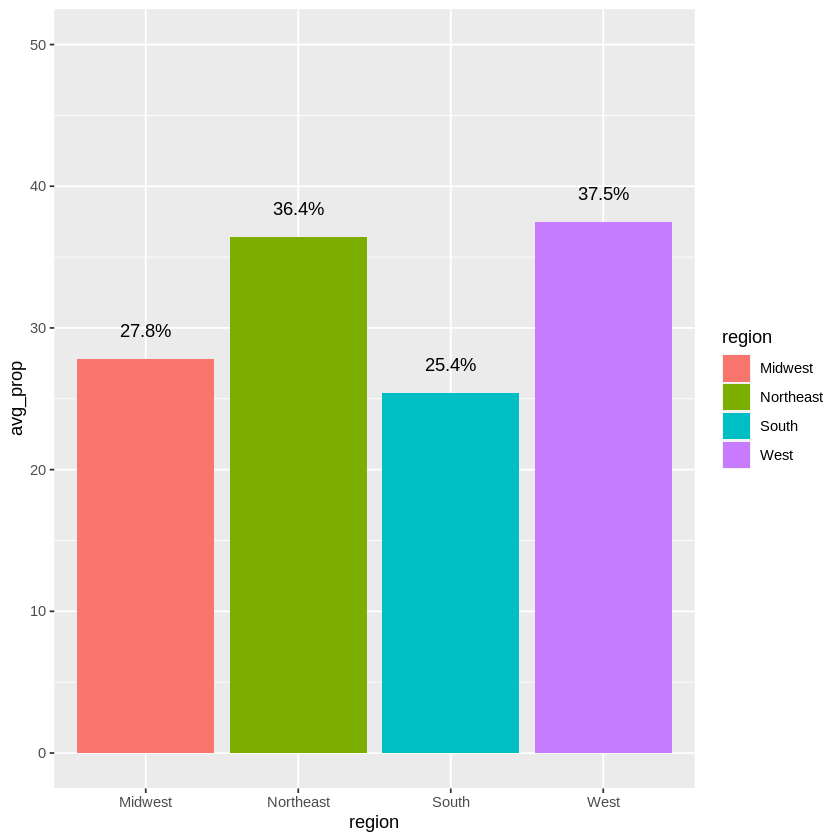

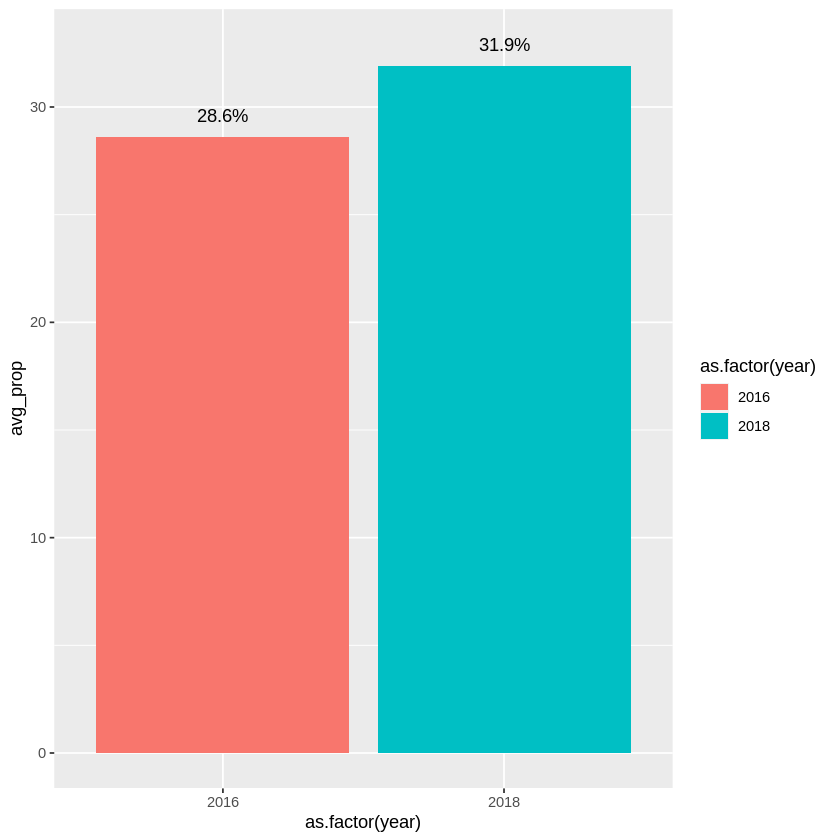

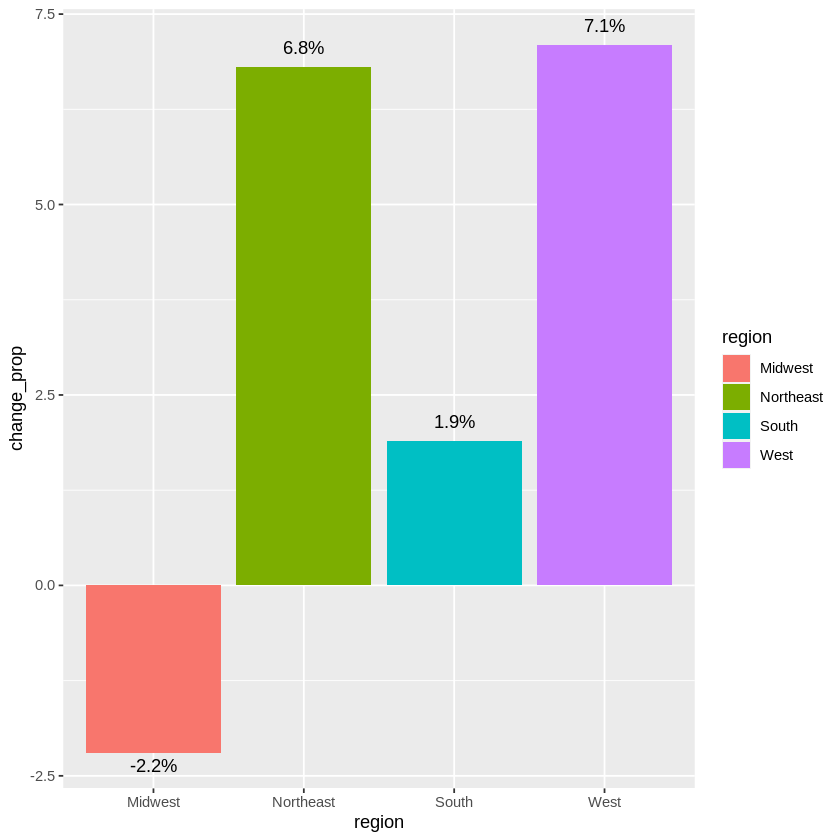

In [90]:
## Female proportion of winners, 2016 vs 2018

# 2016, female % of winning candidates
female_win_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2016)

# By region
female_prop_region_16 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2016)

female_prop_region_16 %>%
    ggplot(aes(x = region, y = avg_prop, fill = region, label = paste(avg_prop, "%", sep = ""))) +
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) +
        ylim(0,50)


# 2018, female % of winning candidates
female_win_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female")) %>%
    group_by(winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2018)



# By region
female_prop_region_18 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female")) %>%
    group_by(region, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2018)

female_prop_region_18 %>%
    ggplot(aes(x = region, y = avg_prop, fill = region, label = paste(avg_prop, "%", sep = ""))) +
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) +
        ylim(0,50)



# 2016 vs 2018 overall
female_win_2016 %>%
    rbind(female_win_2018) %>%
    ggplot(aes(x = as.factor(year), y = avg_prop, fill = as.factor(year), label = paste(avg_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,1))


# 2016 vs 2018 by region
female_prop_region_16 %>%
    left_join(female_prop_region_18, by = "region") %>%
    mutate(change_prop = avg_prop.y - avg_prop.x,
            vjust = ifelse(change_prop >= 0, -1, 1.5)) %>%
    ggplot(aes(x = region, y = change_prop, fill = region)) + 
        geom_bar(stat = "identity") + 
        geom_text(aes(label = paste(change_prop, "%", sep = ""), vjust = vjust))



`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)



region,state,female,male,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Midwest,Illinois,0.46808511,0.5319149,0.06382979
West,Nevada,0.43750000,0.5625000,0.12500000
West,Colorado,0.41176471,0.5882353,0.17647059
West,Alaska,0.40909091,0.5909091,0.18181818
Northeast,Rhode Island,0.39130435,0.6086957,0.21739130
Midwest,Minnesota,0.36507937,0.6269841,0.26190476
West,Washington,0.36734694,0.6326531,0.26530612
Northeast,Maine,0.35772358,0.6260163,0.26829268
West,Idaho,0.36585366,0.6341463,0.26829268


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



region,avg_diff
<chr>,<dbl>
South,0.5346283
Northeast,0.4049463
Midwest,0.4026670
West,0.3779722


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



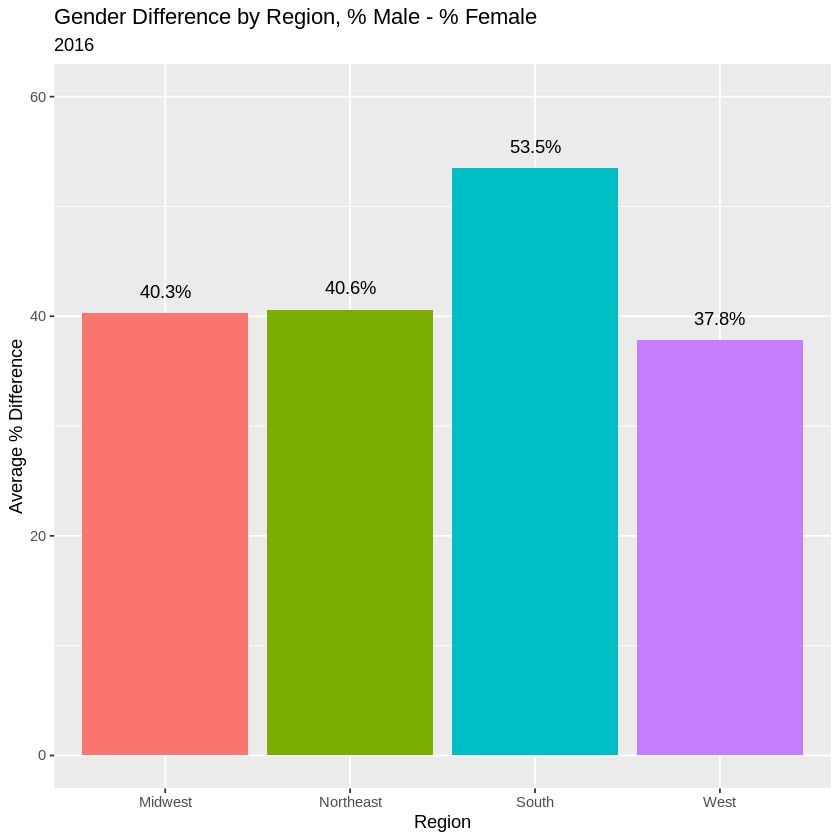

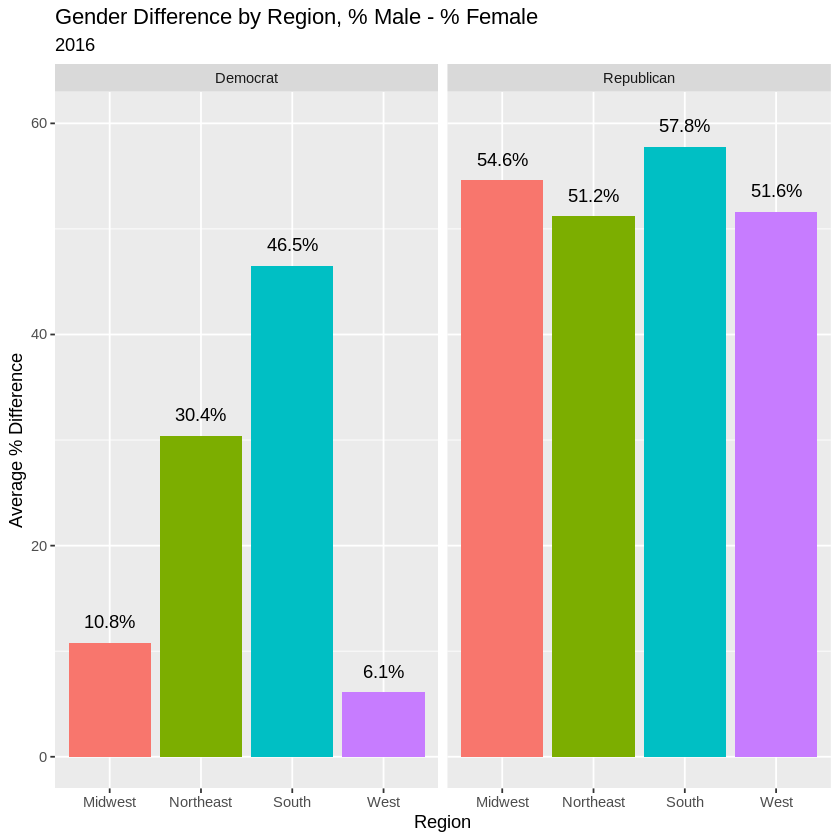

In [40]:
## Gender proportion of winning candidates by state
elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    select(-'Other candidate')

elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    select(-'Other candidate') %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff))


# Gender proportion of winning candidates by region
elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    group_by(region) %>%
    summarize(avg_diff = round(100*mean(diff),1)) %>%
    arrange(desc(avg_diff)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2016",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,60)

# Group by party
elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
            diff = replace_na(diff, 1)) %>%
    group_by(region, winner_party) %>%
    summarize(avg_diff = round(100*mean(diff), 1)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ winner_party) +
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2016",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,60)



`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)



region,state,female,male,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
West,Colorado,0.5000000,0.5000000,0.00000000
West,Nevada,0.5000000,0.5000000,0.00000000
West,Washington,0.4642857,0.5357143,0.07142857
Northeast,Vermont,0.4411765,0.5588235,0.11764706
West,Alaska,0.4347826,0.5652174,0.13043478
West,New Mexico,0.4347826,0.5652174,0.13043478
West,Oregon,0.4324324,0.5675676,0.13513514
Northeast,Maine,0.4090909,0.5909091,0.18181818
West,Arizona,0.4069767,0.5930233,0.18604651


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



region,avg_diff
<chr>,<dbl>
South,0.5413627
Midwest,0.4685333
Northeast,0.3028204
West,0.2519538


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



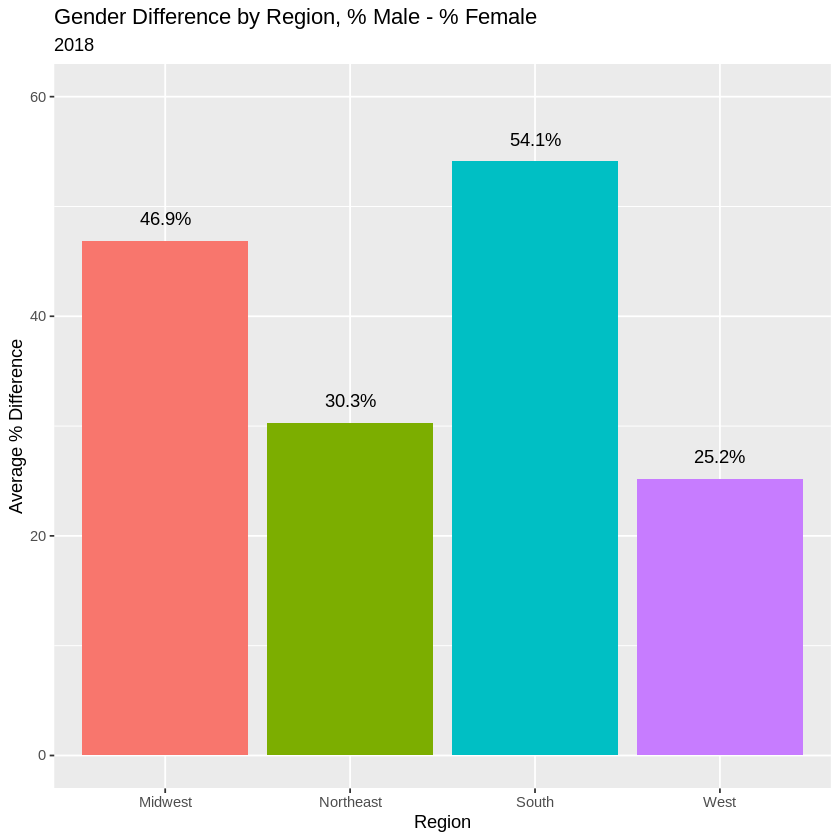

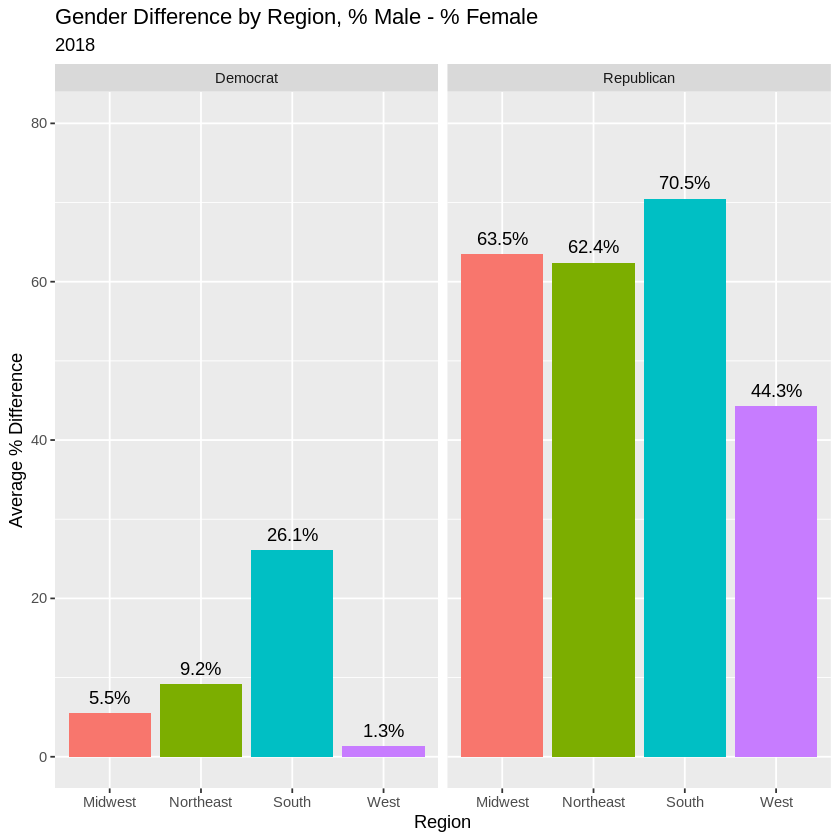

In [41]:
## Same as previous, for 2018
elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff)

elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
          diff = replace_na(diff, 1)) %>%
    arrange(diff) %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff))


# gender proportion of winning candidates by region
elections_2018 %>%
    filter(winner_gender %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
          diff = replace_na(diff, 1)) %>%
    group_by(region) %>%
    summarize(avg_diff = round(100*mean(diff),1)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,60)

# Group by party
elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
            diff = replace_na(diff, 1)) %>%
    group_by(region, winner_party) %>%
    summarize(avg_diff = round(100*mean(diff), 1)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ winner_party) +
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,80)



`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



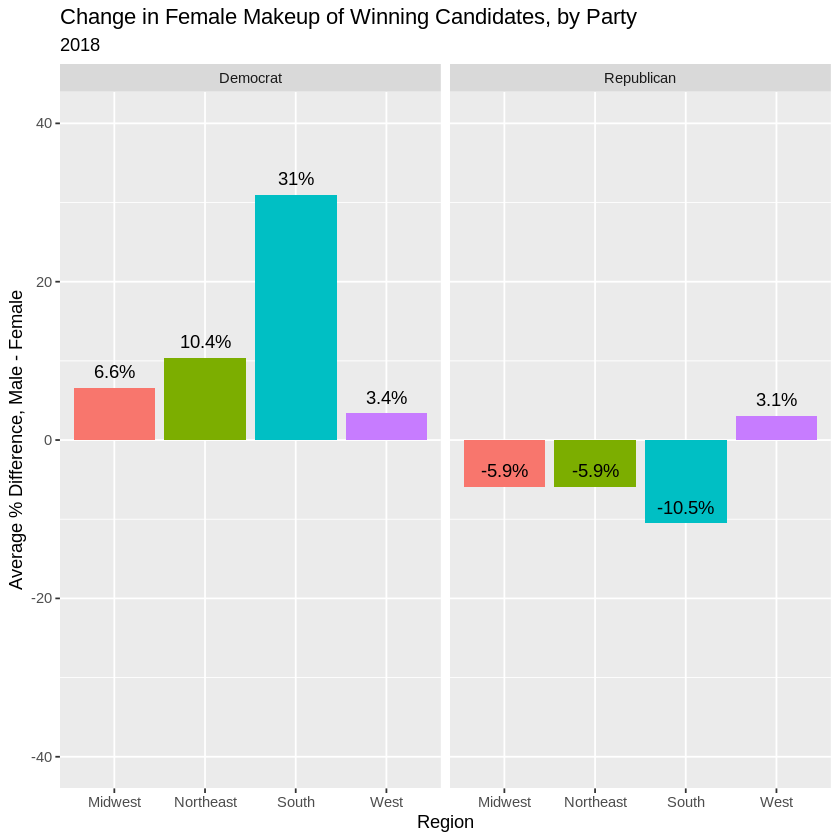

In [47]:
## 2016 vs 2018 winning pool make up
makeup_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff_2016 = male - female,
            diff_2016 = replace_na(diff_2016, 1)) %>%
    mutate(year = 2016)%>%
    select(year, region, state, winner_party, diff_2016)


makeup_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff_2018 = male - female,
            diff_2018 = replace_na(diff_2018, 1)) %>%
    mutate(year = 2018) %>%
    select(year, region, state, winner_party, diff_2018)

makeup_total <- makeup_2016 %>%
    left_join(makeup_2018, by = c("region", "state", "winner_party"))

makeup_total %>%
    mutate(change = diff_2016 - diff_2018,
          change = replace_na(change, 0)) %>%
    group_by(region, winner_party) %>%
    summarize(avg_change = round(100*mean(change), 1)) %>%
    ggplot(aes(x = region, y = avg_change, fill = region, label = paste(avg_change, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ winner_party) +
        labs(title = "Change in Female Makeup of Winning Candidates, by Party",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference, Male - Female") + 
        theme(legend.position = "none") + 
        ylim(-40,40)


`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



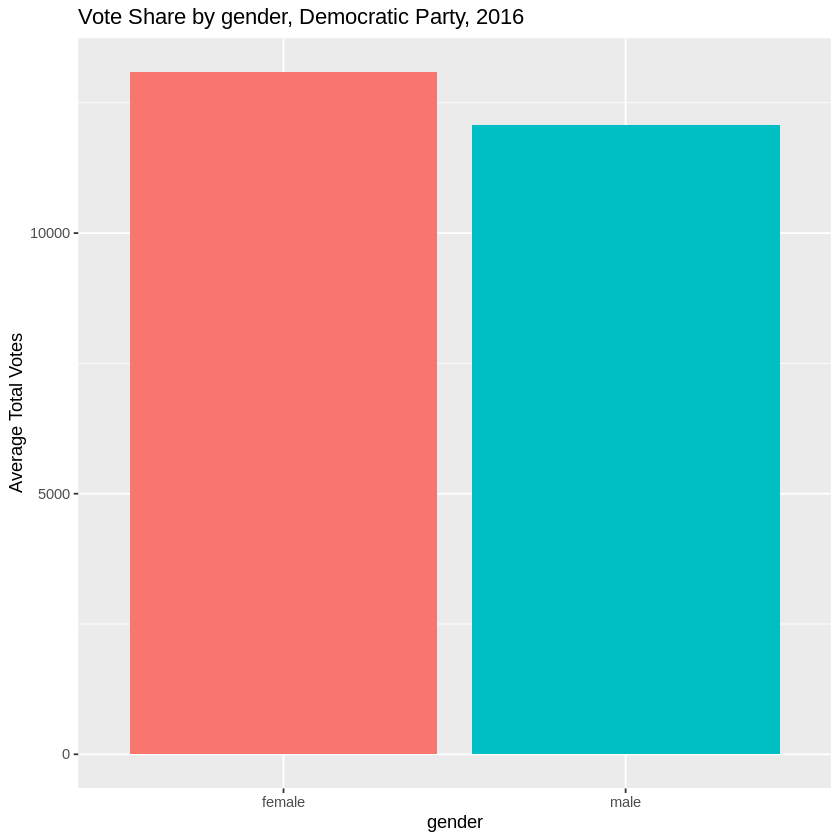

`summarise()` regrouping output by 'gender_dem', 'gender_rep' (override with `.groups` argument)



gender_dem,gender_rep,winner_party,count
<chr>,<chr>,<chr>,<int>
female,female,Democrat,67
female,female,Other,1
female,female,Republican,116
female,male,Democrat,227
female,male,Other,1
female,male,Republican,353
male,female,Democrat,111
male,female,Other,1
male,female,Republican,156


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



state,prop_diff
<chr>,<dbl>
Alaska,0.1818182
Arkansas,0.6521739
California,0.5438596
Colorado,0.1764706
Connecticut,0.4476190
Delaware,0.6000000


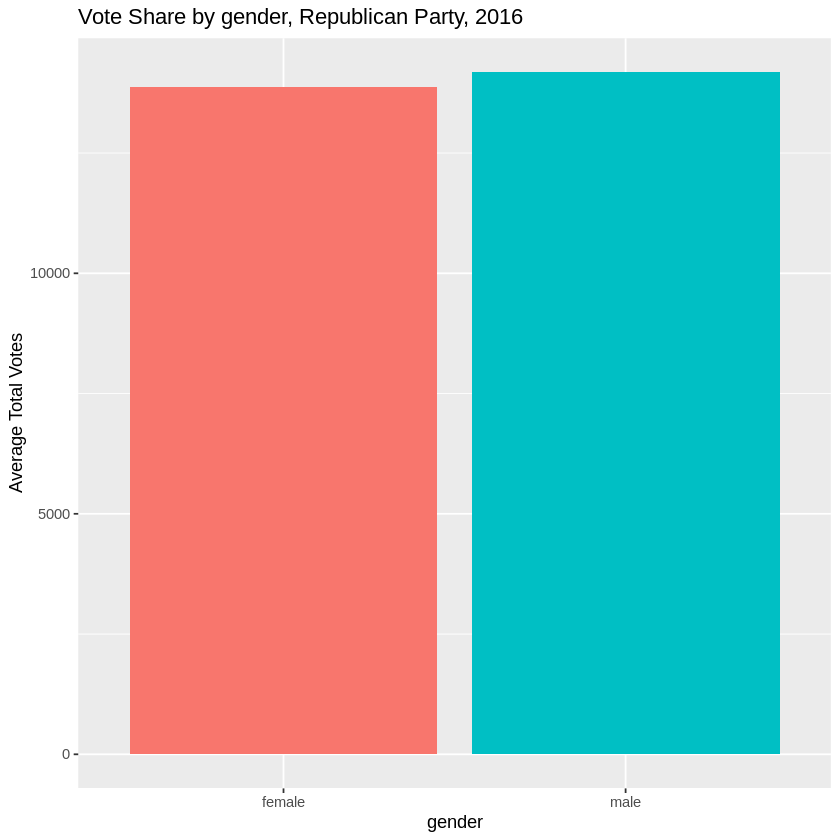

In [155]:
## Graphs (need to change vote total to vote share, vote total is bad stats), also just needs general proofreading
elections_2016 %>%
    group_by(year, gender_dem) %>%
    filter(gender_dem %in% c("male", "female"), !is.na(democrat_votes)) %>%
    summarize(count = n(), 
              mean_votes = mean(democrat_votes)) %>%
    ggplot(aes(x = gender_dem, y = mean_votes, fill = gender_dem)) + 
        geom_bar(stat = "identity") + 
        labs(title = "Vote Share by gender, Democratic Party, 2016",
            y = "Average Total Votes",
            x = "gender") +
        theme(legend.position = "none")

elections_2016 %>%
    group_by(year, gender_rep) %>%
    filter(gender_rep %in% c("male", "female"), !is.na(republican_votes)) %>%
    summarize(count = n(),
              mean_votes = mean(republican_votes)) %>%
    ggplot(aes(x = gender_rep, y = mean_votes, fill = gender_rep)) + 
        geom_bar(stat = "identity") +
        labs(title = "Vote Share by gender, Republican Party, 2016",
            y = "Average Total Votes",
            x = "gender") +
        theme(legend.position = "none")


## Tables  (need to work on this whole section, not currently working)
elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(gender_dem, gender_rep, winner_party) %>%
    summarize(count = n())

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()


##Vote Prop of winning candidates

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>% # This calculation only works with paired rows, e.g. row 1 is state A Males, row 2 is state A Females, etc. tbh prob better to do these kind of calculations with wide datasets, will look at later
    filter(abs(prop_diff) > 0.05) %>%
    head()





In [156]:
head (elections_2018_long)
head(elections_2018)

,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity,region
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing,South
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing,South
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year,region
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018,South
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018,South
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018,South
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018,South
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018,South
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018,South


In [157]:
elections_2018_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) 


elections_2016_long %>%
 filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) 


#overall vote.prop averages for Dem candidates by gender in races which weren't unopposed

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4959456
male,0.4984242


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4778499
male,0.4688065


In [158]:
elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 

elections_2016_long %>%
filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean(vote_prop)) 
#overall vote.prop averages for Repub candidates by gender in races which weren't unopposed
#2016 numbers off or would these higher props be due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4846782
male,0.5174242


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.5334219
male,0.5482527


In [159]:
elections_2018_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 

elections_2016_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 


#overall props by gender regardless of party
#highers props due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4922684
male,0.5099602


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4988748
male,0.5132029


In [160]:
elections_2018_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2018_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()


#average voting props for women candidates grouped by state
elections_2016_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2016_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2016_long%>% 
    filter(candidate_party == "Republican", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

#was hoping to find differences in vote prop for women candidates by state between 2016 and 2018, splitting into parties as well
#is there a way to join between corresponding 2016 and 2018 summaries, then subtracting out?

`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.4260917
Alaska,0.5001140
Arizona,0.4911919
Arkansas,0.4934839
California,0.4902475
Colorado,0.5134712


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.3569806
Alaska,0.4412298
Arizona,0.4784230
Arkansas,0.4236310
California,0.5509966
Colorado,0.5468281


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.7124091
Alaska,0.5861756
Arizona,0.5160577
Arkansas,0.5866211
California,0.3943279
Colorado,0.4546060


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.4671111
Arkansas,0.4528645
California,0.4902361
Colorado,0.5264582
Connecticut,0.5180139
Delaware,0.4445916


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.3447284
Arkansas,0.3560999
California,0.5698057
Colorado,0.5197604
Connecticut,0.5266908
Delaware,0.4456568


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.5612517
Arkansas,0.5818840
California,0.3672649
Colorado,0.5355200
Connecticut,0.5036783
Delaware,0.4427276


In [162]:
elections_2018_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(district)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) %>% head()

#idea was to use process above (if someone finds it), and use at district level as well
#does this make sense at this level as something to find?


`summarise()` ungrouping output (override with `.groups` argument)



district,mean_gen_prop
<chr>,<dbl>
Addison-1,0.6559154
Addison-2,0.7564767
Addison-3,0.6562926
Addison-4,0.7061595
Addison-5,0.6430793
Addison-Rutland,0.4981745


In [163]:

reg <- lm (vote_prop~ candidate_party+state+district+ gender, elections_2018_long  %>% filter (gender %in% c("male", "female"), vote_prop !=1))
tidy (reg)

#regression looking at effect of gender on voting share in 2018

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.4866392160,0.12353646,3.939235573,8.255836e-05
candidate_partyRepublican,0.0130042130,0.00416131,3.125028402,1.785354e-03
stateAlaska,-0.0116496721,0.02597015,-0.448579234,6.537495e-01
stateArizona,-0.0013852153,0.02216708,-0.062489753,9.501747e-01
stateArkansas,0.0131453652,0.02456843,0.535051142,5.926320e-01
stateCalifornia,0.0088459762,0.02081728,0.424934223,6.708981e-01
stateColorado,-0.0053094320,0.02236385,-0.237411326,8.123448e-01
stateConnecticut,0.0001097254,0.01815854,0.006042635,9.951789e-01
stateDelaware,0.0019928799,0.02627106,0.075858367,9.395340e-01


In [164]:
reg <- lm (vote_prop~ candidate_party+state+district+ gender,elections_2016_long  %>% filter (gender %in% c("male", "female"), vote_prop !=1))
library (broom)
tidy (reg)

#regression for 2016

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.486074075,0.03876529,12.5388989,2.295384e-35
candidate_partyRepublican,0.074538985,0.00538265,13.8480077,1.414108e-42
stateArkansas,0.044488149,0.03396115,1.3099718,1.902851e-01
stateCalifornia,0.016730808,0.02934952,0.5700539,5.686751e-01
stateColorado,0.007519064,0.02970111,0.2531577,8.001602e-01
stateConnecticut,0.026300040,0.02760556,0.9527081,3.407990e-01
stateDelaware,0.044985015,0.03782070,1.1894285,2.343459e-01
stateFlorida,0.027439800,0.02949984,0.9301678,3.523437e-01
stateGeorgia,0.006968358,0.03429322,0.2031993,8.389902e-01


In [166]:
reg <- lm (vote_prop~ candidate_party+state+district+ incumbent+ gender,elections_2016_long  %>% filter (gender %in% c("male", "female"), vote_prop !=1))
library (broom)
tidy (reg)

#regression for 2016, with incumbent added

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.4128730558,0.02939793,14.044291555,1.033770e-43
candidate_partyRepublican,0.0336083707,0.00415006,8.098285474,7.450687e-16
stateArkansas,0.0451431387,0.02572619,1.754754053,7.938253e-02
stateCalifornia,0.0021054154,0.02223451,0.094691333,9.245650e-01
stateColorado,0.0069076704,0.02249913,0.307019392,7.588456e-01
stateConnecticut,0.0159307073,0.02091263,0.761774509,4.462422e-01
stateDelaware,0.0097832240,0.02865757,0.341383529,7.328339e-01
stateFlorida,0.0320129973,0.02234683,1.432551949,1.520687e-01
stateGeorgia,-0.0047532494,0.02597868,-0.182967292,8.548335e-01


In [167]:
 ttest_2018_Dem_filtered<- elections_2018_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_Dem_filtered)

#did a bunch of t tests for 2018 and 2016


	Welch Two Sample t-test

data:  vote_prop by gender
t = -0.44178, df = 3653.6, p-value = 0.6587
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.013478889  0.008521572
sample estimates:
mean in group female   mean in group male 
           0.4959456            0.4984242 


In [168]:
 ttest_2018_Rep_filtered<- elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_Rep_filtered)



	Welch Two Sample t-test

data:  vote_prop by gender
t = -5.1406, df = 1379.6, p-value = 3.132e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04524211 -0.02024992
sample estimates:
mean in group female   mean in group male 
           0.4846782            0.5174242 


In [169]:
 ttest_2018_overall_filtered<- elections_2018_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_overall_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -4.3878, df = 5435.1, p-value = 1.167e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025596266 -0.009787388
sample estimates:
mean in group female   mean in group male 
           0.4922684            0.5099602 


In [170]:
 ttest_2016_Dem_filtered<- elections_2016_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_Dem_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = 1.2095, df = 1721.6, p-value = 0.2266
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005621049  0.023707746
sample estimates:
mean in group female   mean in group male 
           0.4778499            0.4688065 


In [171]:
 ttest_2016_Repub_filtered<- elections_2016_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_Repub_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -1.8717, df = 880.19, p-value = 0.06158
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0303822388  0.0007206848
sample estimates:
mean in group female   mean in group male 
           0.5334219            0.5482527 


In [172]:
 ttest_2016_overall_filtered<- elections_2016_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_overall_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -2.6007, df = 2608.5, p-value = 0.009356
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025131144 -0.003524987
sample estimates:
mean in group female   mean in group male 
           0.4988748            0.5132029 
